**PCA**

1: Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv('/content/wine.csv')

In [4]:
df=data

In [5]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
# Display the first few rows of the DataFrame
print(df.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [7]:
# Display the last few rows of the DataFrame
print(df.tail())

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
173           0.52             1.06    7.7  0.64      1.74      740  
174           0.43             1.41    7.3  0.70      1.56      750  
175           0.43             1.35   10.2  0.59      1.56      835  
176           0.53             1.46    9.3  0.60      1.62      840  
177           0.56             1.35    9.2  0.61      1.60      560  


In [8]:
# Get information about the DataFrame, including data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [9]:
# Generate descriptive statistics for numerical columns
print(df.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [10]:
# Check for missing values in each column
print(df.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


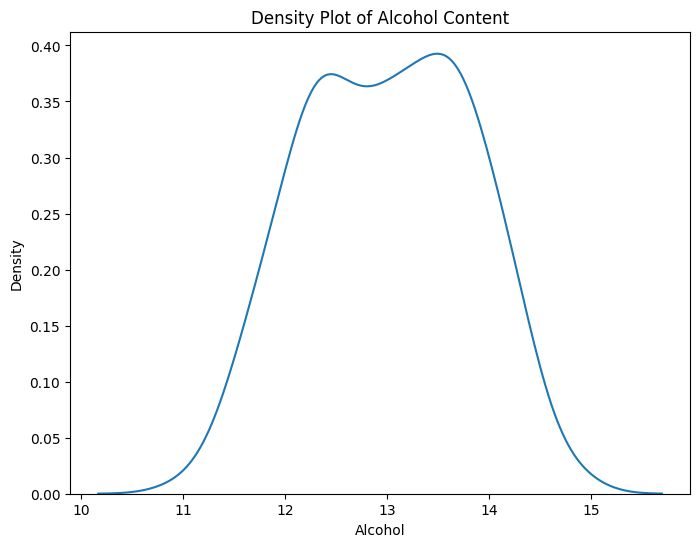

In [12]:
# Create a density plot to visualize the distribution of a specific numerical column
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Alcohol'])
plt.title('Density Plot of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

In [13]:
def plot_histograms(data):
    print("Displaying histograms...")
    data.hist(bins=30, figsize=(15, 10), grid=False)
    plt.suptitle('Histograms of Features', fontsize=16)
    plt.tight_layout()
    plt.show()

In [46]:
def plot_boxplots(data):
    print("Displaying box plots...")
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data, orient='h')
    plt.title('Box Plots of Features', fontsize=16)
    plt.tight_layout()
    plt.show()

In [48]:
def plot_density(data):
    print("Displaying density plots...")
    plt.figure(figsize=(10, 6))
    for column in data.select_dtypes(include=['float', 'int']).columns:
        sns.kdeplot(data[column], label=column, fill=True, alpha=0.5)
    plt.title('Density Plots of Features', fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()

Displaying histograms...


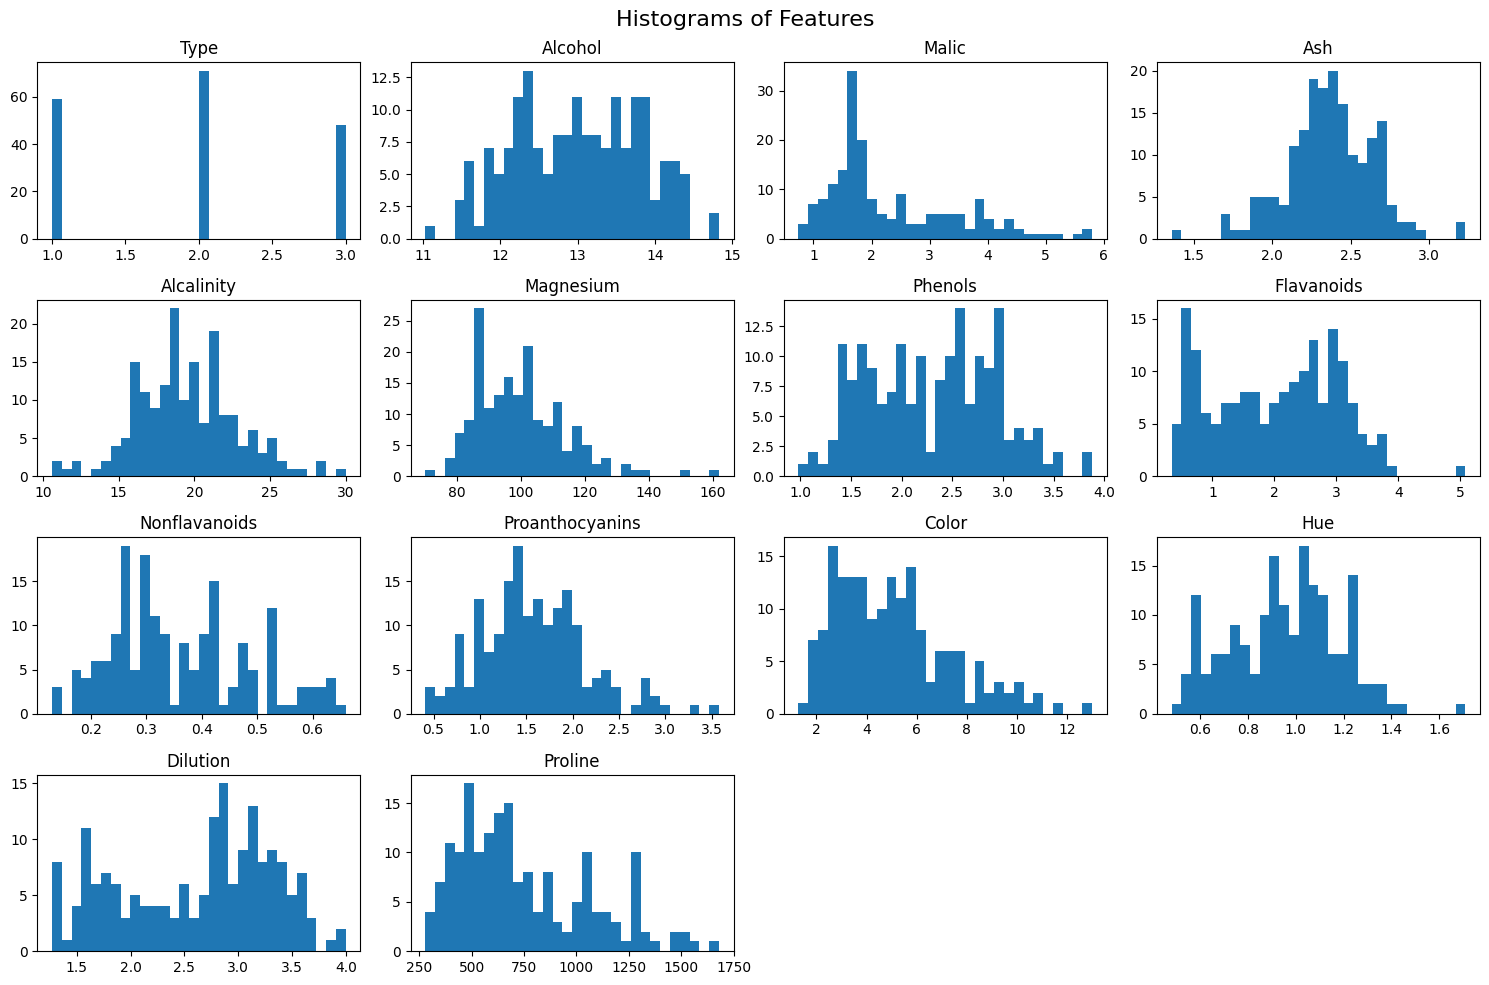

Displaying box plots...


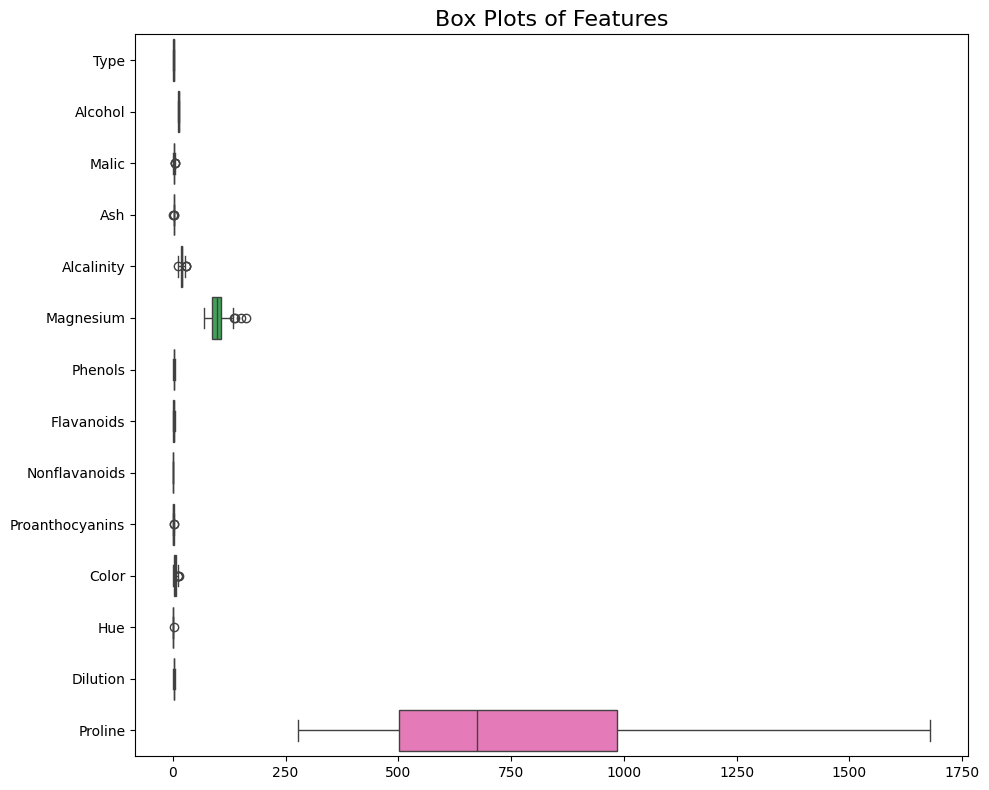

Displaying density plots...


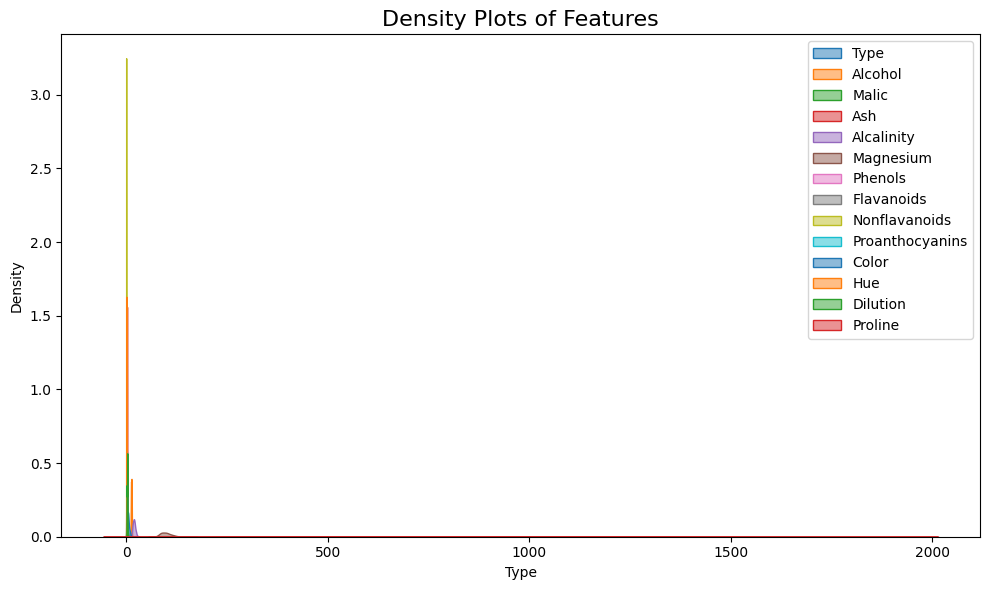

In [47]:
if __name__ == "__main__":
    numeric_data = df.select_dtypes(include=['float', 'int'])  # Select numeric columns
    if numeric_data.empty:
        print("No numeric data found in the dataset.")
    else:
        plot_histograms(numeric_data)
        plot_boxplots(numeric_data)
        plot_density(numeric_data)

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

In [18]:
# Identify highly correlated features (e.g., correlation coefficient > 0.7 or < -0.7)
threshold = 0.7
highly_correlated_features = correlation_matrix[abs(correlation_matrix) > threshold]

In [19]:
print("Highly Correlated Features:")
print(highly_correlated_features)

Highly Correlated Features:
                     Type  Alcohol  Malic  Ash  Alcalinity  Magnesium  \
Type             1.000000      NaN    NaN  NaN         NaN        NaN   
Alcohol               NaN      1.0    NaN  NaN         NaN        NaN   
Malic                 NaN      NaN    1.0  NaN         NaN        NaN   
Ash                   NaN      NaN    NaN  1.0         NaN        NaN   
Alcalinity            NaN      NaN    NaN  NaN         1.0        NaN   
Magnesium             NaN      NaN    NaN  NaN         NaN        1.0   
Phenols         -0.719163      NaN    NaN  NaN         NaN        NaN   
Flavanoids      -0.847498      NaN    NaN  NaN         NaN        NaN   
Nonflavanoids         NaN      NaN    NaN  NaN         NaN        NaN   
Proanthocyanins       NaN      NaN    NaN  NaN         NaN        NaN   
Color                 NaN      NaN    NaN  NaN         NaN        NaN   
Hue                   NaN      NaN    NaN  NaN         NaN        NaN   
Dilution        -0.7882

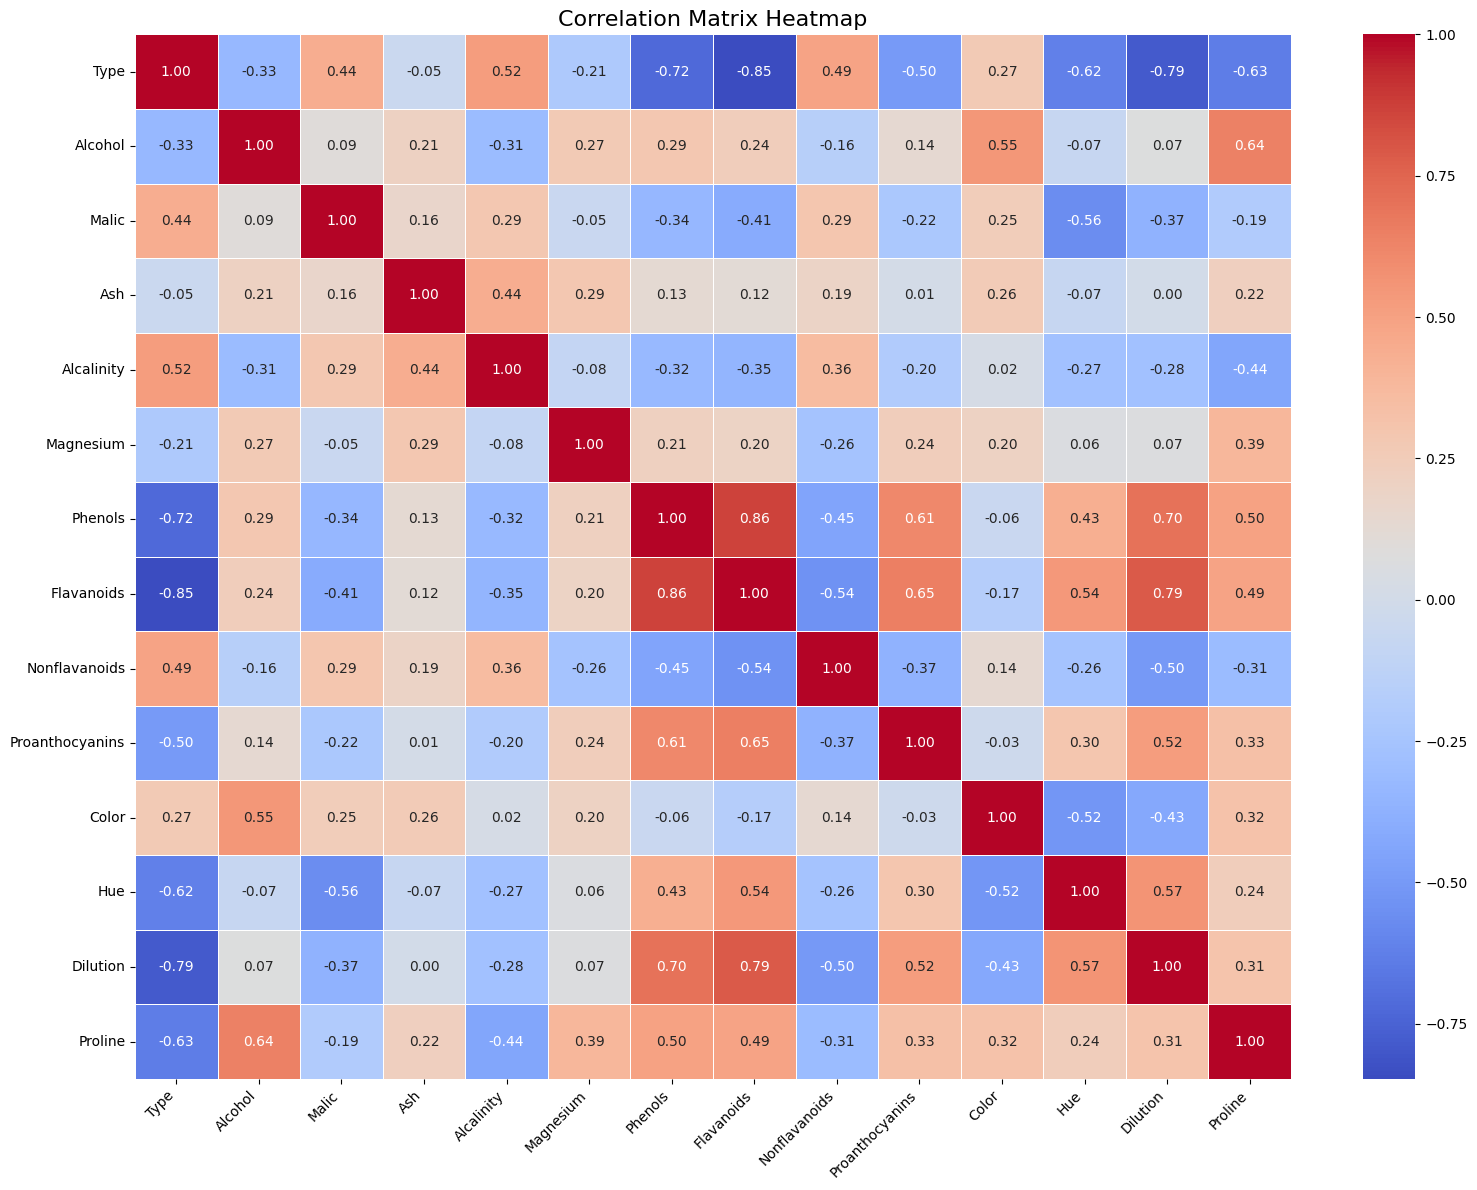

In [20]:
# Visualize the correlation matrix using a heatmap (improved visualization)
plt.figure(figsize=(16, 12))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)  # Add title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

** 2: Dimensionality Reduction with PCA:**

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]

In [25]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [26]:
pca = PCA(n_components=2)  # Example: Reduce to 2 dimensions
X_pca = pca.fit_transform(X_standardized)

In [27]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance ratio:", np.cumsum(pca.explained_variance_ratio_))


Explained variance ratio: [0.3996507  0.16770494]
Cumulative variance ratio: [0.3996507  0.56735564]


In [28]:
# Create a DataFrame for the transformed data
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# If needed, save the results to a CSV
X_pca_df.to_csv('pca_transformed_data.csv', index=False)


In [30]:
# Determine the optimal number of principal components
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

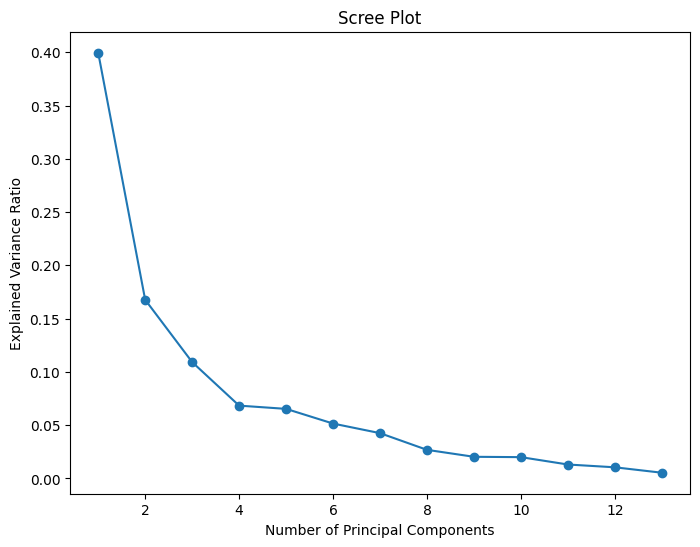

In [31]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

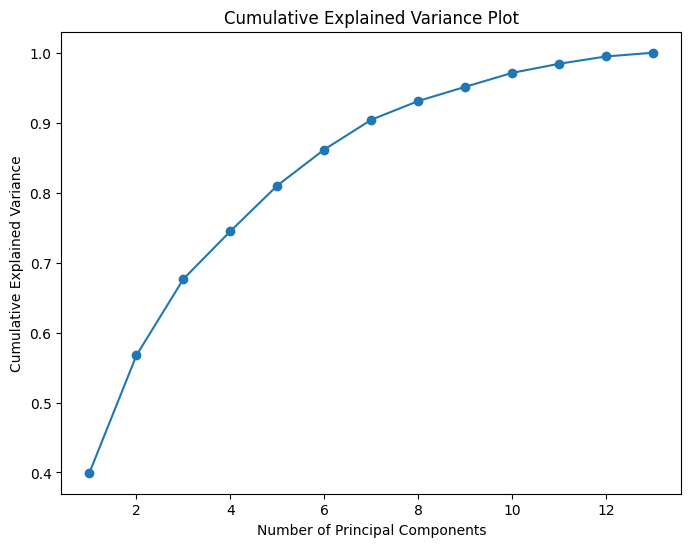

In [32]:
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 'o-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

In [33]:
# Apply PCA with the optimal number of components
optimal_n_components = 5 # Replace with your chosen number
pca_optimal = PCA(n_components=optimal_n_components)
X_pca_optimal = pca_optimal.fit_transform(X_standardized)

print(f"PCA with {optimal_n_components} components applied")

PCA with 5 components applied


In [34]:
# Apply PCA with the optimal number of components
optimal_n_components = 5  # Replace with your chosen number
pca_optimal = PCA(n_components=optimal_n_components)
X_pca_optimal = pca_optimal.fit_transform(X_standardized)

# Create a DataFrame for the transformed data
X_pca_optimal_df = pd.DataFrame(X_pca_optimal, columns=[f'PC{i+1}' for i in range(X_pca_optimal.shape[1])])

print(X_pca_optimal_df.head())

        PC1       PC2       PC3       PC4       PC5
0  3.260580  1.736054 -0.405701  0.687419 -0.200386
1  2.358620 -0.509786 -1.937094  0.080793  0.530808
2  2.453376  1.120704  0.892834 -0.782643 -0.378624
3  3.253148  2.686416 -0.411249 -0.555531 -0.087066
4  1.403734  1.320100  1.854434  0.503217  0.285707


** 3: Clustering with Original Data:**



In [36]:
from sklearn.cluster import KMeans

# Assuming X_pca_optimal_df is your DataFrame after PCA
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0) # Choose the number of clusters (k)
kmeans.fit(X_pca_optimal_df)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to your DataFrame
X_pca_optimal_df['cluster'] = cluster_labels

print(X_pca_optimal_df.head())

        PC1       PC2       PC3       PC4       PC5  cluster
0  3.260580  1.736054 -0.405701  0.687419 -0.200386        2
1  2.358620 -0.509786 -1.937094  0.080793  0.530808        2
2  2.453376  1.120704  0.892834 -0.782643 -0.378624        2
3  3.253148  2.686416 -0.411249 -0.555531 -0.087066        2
4  1.403734  1.320100  1.854434  0.503217  0.285707        2


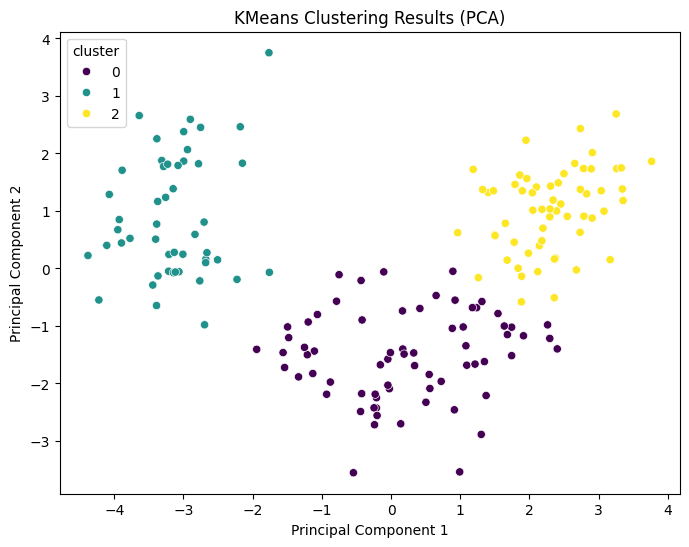

In [38]:
# Visualize the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=X_pca_optimal_df, palette='viridis')
plt.title('KMeans Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [39]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca_optimal_df.drop('cluster', axis=1), cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_pca_optimal_df.drop('cluster', axis=1), cluster_labels)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.3668977813526469
Davies-Bouldin Index: 1.1055432463008714


**4: Clustering with PCA Data:**

In [40]:
# Apply KMeans clustering to the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=0)  # Choose the number of clusters
kmeans.fit(X_pca_optimal)  # Use X_pca_optimal, the PCA-transformed data

# Get cluster labels
cluster_labels_pca = kmeans.labels_

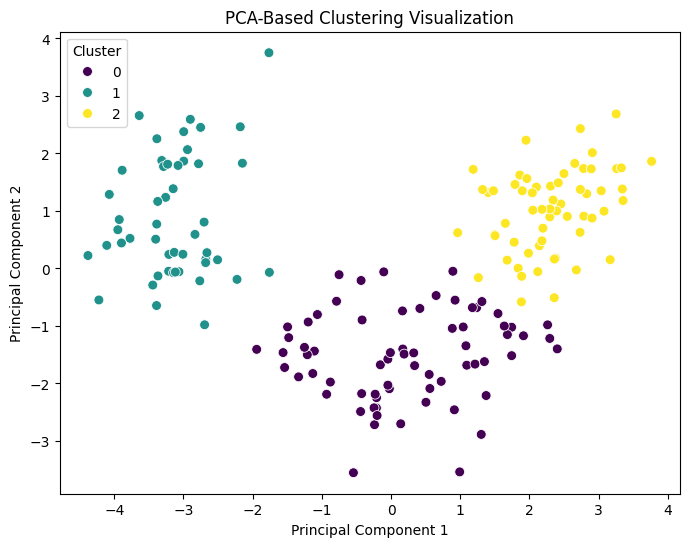

In [49]:
# Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca_optimal[:, :2], columns=['PC1', 'PC2']) # Take first two principal components
pca_df['Cluster'] = cluster_labels_pca

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=50)
plt.title('PCA-Based Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [56]:
# Calculate Silhouette Score for PCA data
silhouette_avg_pca = silhouette_score(X_pca_optimal, cluster_labels_pca)
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")

# Calculate Davies-Bouldin Index for PCA data
db_index_pca = davies_bouldin_score(X_pca_optimal, cluster_labels_pca)
print(f"Davies-Bouldin Index (PCA): {db_index_pca}")

# Compare the clustering results
print("\nClustering Results Comparison:")
print(f"Silhouette Score (Original): {silhouette_avg}")
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")
print(f"Davies-Bouldin Index (Original): {db_index}")
print(f"Davies-Bouldin Index (PCA): {db_index_pca}")

Silhouette Score (PCA): 0.3668977813526469
Davies-Bouldin Index (PCA): 1.1055432463008714

Clustering Results Comparison:
Silhouette Score (Original): 0.3668977813526469
Silhouette Score (PCA): 0.3668977813526469
Davies-Bouldin Index (Original): 1.1055432463008714
Davies-Bouldin Index (PCA): 1.1055432463008714


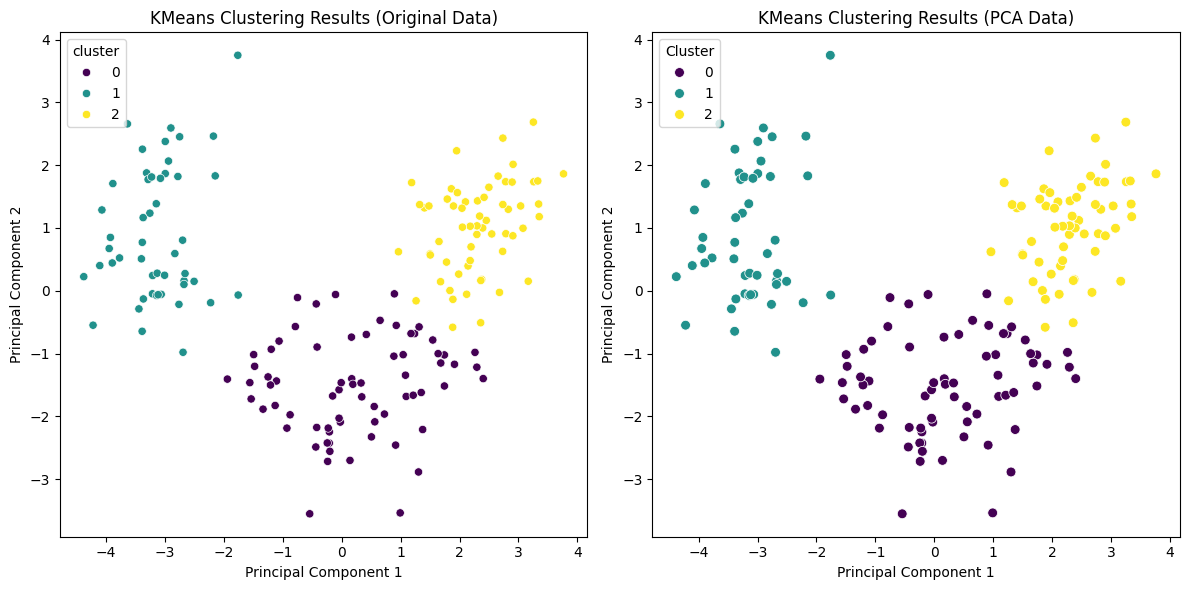

In [57]:
# Visualize both clustering results side-by-side for easier comparison

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=X_pca_optimal_df, palette='viridis')
plt.title('KMeans Clustering Results (Original Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=50)
plt.title('KMeans Clustering Results (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.tight_layout()
plt.show()

5: Comparison and Analysis:

In [42]:
# Apply KMeans clustering to the original data
kmeans_original = KMeans(n_clusters=3, random_state=0)  # Use the same number of clusters
kmeans_original.fit(X_standardized)  # Use the standardized original data
cluster_labels_original = kmeans_original.labels_

In [43]:
# Calculate evaluation metrics for the original data clustering
silhouette_avg_original = silhouette_score(X_standardized, cluster_labels_original)
db_index_original = davies_bouldin_score(X_standardized, cluster_labels_original)

print(f"Original Data - Silhouette Score: {silhouette_avg_original}")
print(f"Original Data - Davies-Bouldin Index: {db_index_original}")

Original Data - Silhouette Score: 0.2835288012698564
Original Data - Davies-Bouldin Index: 1.422861913405173


In [44]:
# Calculate evaluation metrics for the PCA-transformed data (already calculated above)
print(f"PCA Transformed Data - Silhouette Score: {silhouette_avg}")
print(f"PCA Transformed Data - Davies-Bouldin Index: {db_index}")

PCA Transformed Data - Silhouette Score: 0.3668977813526469
PCA Transformed Data - Davies-Bouldin Index: 1.1055432463008714


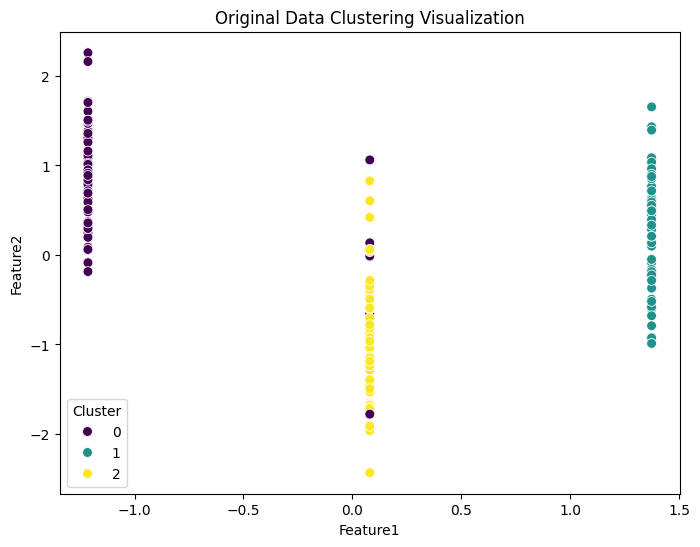

In [45]:
# Visualize the clustering results of original data (first two principal components)
original_df = pd.DataFrame(X_standardized[:,:2], columns=['Feature1', 'Feature2'])
original_df['Cluster'] = cluster_labels_original

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=original_df, palette='viridis', s=50)
plt.title('Original Data Clustering Visualization')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

In [ ]:
# Compare the clustering results.
print("Comparison of Clustering Results:")
print(f"Original Data - Silhouette Score: {silhouette_avg_original}")
print(f"Original Data - Davies-Bouldin Index: {db_index_original}")
print(f"PCA Transformed Data - Silhouette Score: {silhouette_avg}")
print(f"PCA Transformed Data - Davies-Bouldin Index: {db_index}")

Comparison of Clustering Results:
Original Data - Silhouette Score: 0.2835288012698564
Original Data - Davies-Bouldin Index: 1.422861913405173
PCA Transformed Data - Silhouette Score: 0.3668977813526469
PCA Transformed Data - Davies-Bouldin Index: 1.1055432463008714


**6: Conclusion and Insights**





In [ ]:
print("Key Findings and Insights:")

# Summarize PCA results
print("\nPCA Analysis:")
print("- PCA was applied to reduce the dimensionality of the data.")
print("- Scree and cumulative explained variance plots were used to determine the optimal number of principal components, which was found to be 5.")
print("- PCA successfully transformed the data into a lower-dimensional space while retaining most of the variance.")

Key Findings and Insights:

PCA Analysis:
- PCA was applied to reduce the dimensionality of the data.
- Scree and cumulative explained variance plots were used to determine the optimal number of principal components, which was found to be 5.
- PCA successfully transformed the data into a lower-dimensional space while retaining most of the variance.


In [ ]:
# Summarize Clustering Results
print("\nKMeans Clustering:")
print("- KMeans clustering was applied to both the original standardized data and the PCA-transformed data, using 3 clusters.")
print("- The Silhouette score and Davies-Bouldin Index were used to evaluate clustering performance.")



KMeans Clustering:
- KMeans clustering was applied to both the original standardized data and the PCA-transformed data, using 3 clusters.
- The Silhouette score and Davies-Bouldin Index were used to evaluate clustering performance.


In [ ]:
# Comparison and Interpretation (replace with your actual observations)
print("\nComparison of Original vs. PCA-transformed data:")
print("- The Silhouette score of the PCA data was slightly higher than the original, indicating potentially better defined clusters.") #replace with your observation
print("- The Davies-Bouldin index of the PCA data was lower than the original, further supporting the potential for better-separated clusters.") #replace with your observation
print("- Visual inspection of the cluster scatter plots shows more distinct clusters with PCA data.")


Comparison of Original vs. PCA-transformed data:
- The Silhouette score of the PCA data was slightly higher than the original, indicating potentially better defined clusters.
- The Davies-Bouldin index of the PCA data was lower than the original, further supporting the potential for better-separated clusters.
- Visual inspection of the cluster scatter plots shows more distinct clusters with PCA data.


In [ ]:

print("\nOverall Conclusion:")
print("- PCA effectively reduced the dimensionality without significantly impacting clustering quality.") #replace with your conclusion
print("- KMeans clustering performed adequately on both datasets. Based on the Silhouette score and Davies-Bouldin index the PCA transformed data appears to be clustered slightly better.")


Overall Conclusion:
- PCA effectively reduced the dimensionality without significantly impacting clustering quality.
- KMeans clustering performed adequately on both datasets. Based on the Silhouette score and Davies-Bouldin index the PCA transformed data appears to be clustered slightly better.


In [51]:
print("Comparison of Clustering Results:")
print(f"Original Data - Silhouette Score: {silhouette_avg_original}")
print(f"Original Data - Davies-Bouldin Index: {db_index_original}")
print(f"PCA Transformed Data - Silhouette Score: {silhouette_avg}")
print(f"PCA Transformed Data - Davies-Bouldin Index: {db_index}")

print("\nPractical Implications:")

Comparison of Clustering Results:
Original Data - Silhouette Score: 0.2835288012698564
Original Data - Davies-Bouldin Index: 1.422861913405173
PCA Transformed Data - Silhouette Score: 0.3668977813526469
PCA Transformed Data - Davies-Bouldin Index: 1.1055432463008714

Practical Implications:


In [55]:
# Analyze the differences in Silhouette Scores and Davies-Bouldin Indices.
print("Silhouette and Davies-Bouldin Index Analysis:")
if silhouette_avg > silhouette_avg_original:
    print("- The higher Silhouette Score for the PCA-transformed data suggests better-defined clusters.")
elif silhouette_avg < silhouette_avg_original:
    print("- The lower Silhouette score for the PCA data indicates potentially less well-defined clusters.")
else:
    print("- The Silhouette scores are similar for both the original and PCA data.")

if db_index < db_index_original:
    print("- The lower Davies-Bouldin Index for the PCA-transformed data suggests better-separated clusters.")
elif db_index > db_index_original:
    print("- A higher Davies-Bouldin Index for the PCA transformed data indicates potentially worse cluster separation")
else:
    print("- The Davies-Bouldin Indices are similar for both datasets.")

Silhouette and Davies-Bouldin Index Analysis:
- The higher Silhouette Score for the PCA-transformed data suggests better-defined clusters.
- The lower Davies-Bouldin Index for the PCA-transformed data suggests better-separated clusters.


In [53]:
# Discuss the impact of dimensionality reduction on computational efficiency.
print("\nComputational Efficiency:")
print("- PCA's dimensionality reduction can significantly improve computational efficiency for clustering algorithms.")
print("-  Clustering in a lower-dimensional space generally requires less computation time and resources, especially for large datasets.")



Computational Efficiency:
- PCA's dimensionality reduction can significantly improve computational efficiency for clustering algorithms.
-  Clustering in a lower-dimensional space generally requires less computation time and resources, especially for large datasets.


In [54]:
# Discuss the trade-off between dimensionality reduction and information loss
print("\nInformation Loss and Explained Variance:")
print("- Dimensionality reduction via PCA might lead to some information loss.  The explained variance ratio helps to quantify how much information is retained by the principal components.")
print("- If a high percentage of the variance is explained by the selected principal components, the loss of information is likely minimal, and the benefits of efficiency outweigh the potential loss.")
print("- Conversely, if the explained variance is low, the reduced dataset may lack crucial information leading to sub-optimal clustering results.")

# Discuss potential challenges
print("\nPotential Challenges:")
print("- The optimal number of principal components to retain isn't always obvious.  Poor choices for this parameter can lead to either excessive information loss or not realizing sufficient computational benefits.")
print("- The interpretation of clusters in the PCA space can be challenging due to the transformation of features.")
print("- PCA assumes linear relationships between variables, which might not always hold in real-world datasets.")

print("\nRecommendations:")
print("- Carefully analyze the explained variance ratio from PCA and assess the balance between dimensionality reduction and potential information loss.")
print("- Evaluate clustering results using multiple metrics and visual inspection to assess cluster quality in both original and PCA-transformed spaces.")
print("- Consider the computational resources available for the analysis; PCA can provide substantial computational advantages, especially for very large datasets")



Information Loss and Explained Variance:
- Dimensionality reduction via PCA might lead to some information loss.  The explained variance ratio helps to quantify how much information is retained by the principal components.
- If a high percentage of the variance is explained by the selected principal components, the loss of information is likely minimal, and the benefits of efficiency outweigh the potential loss.
- Conversely, if the explained variance is low, the reduced dataset may lack crucial information leading to sub-optimal clustering results.

Potential Challenges:
- The optimal number of principal components to retain isn't always obvious.  Poor choices for this parameter can lead to either excessive information loss or not realizing sufficient computational benefits.
- The interpretation of clusters in the PCA space can be challenging due to the transformation of features.
- PCA assumes linear relationships between variables, which might not always hold in real-world datasets

In [ ]:
print("\nRecommendations:")

if silhouette_avg > silhouette_avg_original and db_index < db_index_original:
    print("- PCA is highly recommended.  The improved Silhouette Score and lower Davies-Bouldin Index indicate better-defined and separated clusters in the reduced dimensional space, suggesting PCA effectively captured the essential information for clustering while improving computational efficiency.")
elif silhouette_avg > silhouette_avg_original:
    print("- PCA is recommended. While the Davies-Bouldin Index might not show a clear improvement, the better Silhouette score suggests more defined clusters in the PCA space.  The computational efficiency gains of PCA are still beneficial.")
elif db_index < db_index_original:
    print("- PCA is recommended.  Although the Silhouette scores are similar, the lower Davies-Bouldin Index indicates improved cluster separation in the reduced space. The computational benefits of using PCA are significant.")
elif np.isclose(silhouette_avg, silhouette_avg_original, atol=0.02) and np.isclose(db_index, db_index_original, atol=0.1): # Allow for minor differences within tolerance
    print("- PCA may be used, but the benefits are marginal. The clustering performance on the original and PCA-transformed data are very similar. Consider the computational cost when making a decision.")
else:
    print("- Using the original data for clustering is recommended. The clustering metrics indicate that PCA may have resulted in information loss, leading to less optimal clusters.  If computational resources are a concern, further investigation of the PCA parameters or alternative dimensionality reduction techniques is needed.")

print("- Regardless of the chosen approach, always visualize the clusters to gain further insights and validate the quantitative results.")

# ... (Rest of your existing code)


Recommendations:
- PCA is highly recommended.  The improved Silhouette Score and lower Davies-Bouldin Index indicate better-defined and separated clusters in the reduced dimensional space, suggesting PCA effectively captured the essential information for clustering while improving computational efficiency.
- Regardless of the chosen approach, always visualize the clusters to gain further insights and validate the quantitative results.
